In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv('./data/nfl_elo.csv')
df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,1920-09-26,1920,0,NaN,RII,STP,1503.947,1300.000,0.824651,0.175349,...,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
1,1920-10-03,1920,0,NaN,CBD,PTQ,1504.688,1300.000,0.825267,0.174733,...,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
2,1920-10-03,1920,0,NaN,CHI,MUT,1368.333,1300.000,0.682986,0.317014,...,NaN,NaN,NaN,NaN,NaN,20,0,NaN,NaN,NaN
3,1920-10-03,1920,0,NaN,RII,MUN,1516.108,1478.004,0.644171,0.355829,...,NaN,NaN,NaN,NaN,NaN,45,0,NaN,NaN,NaN
4,1920-10-03,1920,0,NaN,DAY,COL,1493.002,1504.908,0.575819,0.424181,...,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN


In [3]:
df.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre',
       'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2',
       'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post',
       'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'quality',
       'importance', 'total_rating'],
      dtype='object')

In [4]:
df.drop(['date', 'playoff', 'elo1_post' ,'elo2_post', 'qb1_adj', 'qb2_adj', 'qb1_game_value', 'qb2_game_value', 
         'qb1_value_post', 'qb2_value_post', 'qbelo1_post' , 'qbelo2_post', 'qb1', 'qb2'], axis = 1, inplace = True)
df.head()

,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,qbelo1_pre,qbelo2_pre,qb1_value_pre,qb2_value_pre,qbelo_prob1,qbelo_prob2,score1,score2,quality,importance,total_rating
0,1920,0,RII,STP,1503.947,1300.000,0.824651,0.175349,NaN,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
1,1920,0,CBD,PTQ,1504.688,1300.000,0.825267,0.174733,NaN,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
2,1920,0,CHI,MUT,1368.333,1300.000,0.682986,0.317014,NaN,NaN,NaN,NaN,NaN,NaN,20,0,NaN,NaN,NaN
3,1920,0,RII,MUN,1516.108,1478.004,0.644171,0.355829,NaN,NaN,NaN,NaN,NaN,NaN,45,0,NaN,NaN,NaN
4,1920,0,DAY,COL,1493.002,1504.908,0.575819,0.424181,NaN,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN


In [5]:
df.columns

Index(['season', 'neutral', 'team1', 'team2', 'elo1_pre', 'elo2_pre',
       'elo_prob1', 'elo_prob2', 'qbelo1_pre', 'qbelo2_pre', 'qb1_value_pre',
       'qb2_value_pre', 'qbelo_prob1', 'qbelo_prob2', 'score1', 'score2',
       'quality', 'importance', 'total_rating'],
      dtype='object')

In [6]:
df = df[df.season > 1980]
df.head()

,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,qbelo1_pre,qbelo2_pre,qb1_value_pre,qb2_value_pre,qbelo_prob1,qbelo_prob2,score1,score2,quality,importance,total_rating
6788,1981,0,TB,MIN,1406.844,1500.060,0.459483,0.540517,1399.748069,1509.447526,103.389980,45.089928,0.464581,0.535419,21,13,21.0,NaN,NaN
6789,1981,0,DEN,OAK,1521.128,1646.467,0.414028,0.585972,1507.372471,1646.418709,103.172340,83.751010,0.395053,0.604947,9,7,84.0,NaN,NaN
6790,1981,0,NE,IND,1558.953,1457.599,0.722643,0.277357,1568.971841,1450.854773,84.114320,103.168153,0.726431,0.273569,28,29,51.0,NaN,NaN
6791,1981,0,NYG,PHI,1392.378,1604.258,0.300376,0.699624,1397.419192,1601.681408,71.634224,94.924866,0.302353,0.697647,10,24,44.0,NaN,NaN
6792,1981,0,LAR,TEN,1562.771,1569.795,0.582668,0.417332,1569.723364,1576.769224,79.304654,72.899521,0.565516,0.434484,20,27,80.0,NaN,NaN


In [7]:
df['EloDiff'] = df.elo1_pre - df.elo2_pre
df['teamOneWin'] = (df.score1 > df.score2).replace({True: 1, False: 0})
df.head()

,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,qbelo1_pre,qbelo2_pre,...,qb2_value_pre,qbelo_prob1,qbelo_prob2,score1,score2,quality,importance,total_rating,EloDiff,teamOneWin
6788,1981,0,TB,MIN,1406.844,1500.060,0.459483,0.540517,1399.748069,1509.447526,...,45.089928,0.464581,0.535419,21,13,21.0,NaN,NaN,-93.216,1
6789,1981,0,DEN,OAK,1521.128,1646.467,0.414028,0.585972,1507.372471,1646.418709,...,83.751010,0.395053,0.604947,9,7,84.0,NaN,NaN,-125.339,1
6790,1981,0,NE,IND,1558.953,1457.599,0.722643,0.277357,1568.971841,1450.854773,...,103.168153,0.726431,0.273569,28,29,51.0,NaN,NaN,101.354,0
6791,1981,0,NYG,PHI,1392.378,1604.258,0.300376,0.699624,1397.419192,1601.681408,...,94.924866,0.302353,0.697647,10,24,44.0,NaN,NaN,-211.880,0
6792,1981,0,LAR,TEN,1562.771,1569.795,0.582668,0.417332,1569.723364,1576.769224,...,72.899521,0.565516,0.434484,20,27,80.0,NaN,NaN,-7.024,0


In [8]:
df.groupby('teamOneWin').mean()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,qbelo1_pre,qbelo2_pre,qb1_value_pre,qb2_value_pre,qbelo_prob1,qbelo_prob2,score1,score2,quality,importance,total_rating,EloDiff
teamOneWin,,,,,,,,,,,,,,,,,,
0,2002.211552,0.006876,1482.481357,1529.793558,0.522236,0.477764,1482.514515,1529.092858,96.536473,116.361594,0.509795,0.490205,16.178088,26.825579,48.691497,55.318841,52.130435,-47.312201
1,2001.623149,0.008580,1528.625988,1490.631713,0.628589,0.371411,1527.403140,1490.779862,113.554663,98.557663,0.624553,0.375447,27.652423,15.219381,50.238055,47.476190,46.823129,37.994275


<AxesSubplot:>

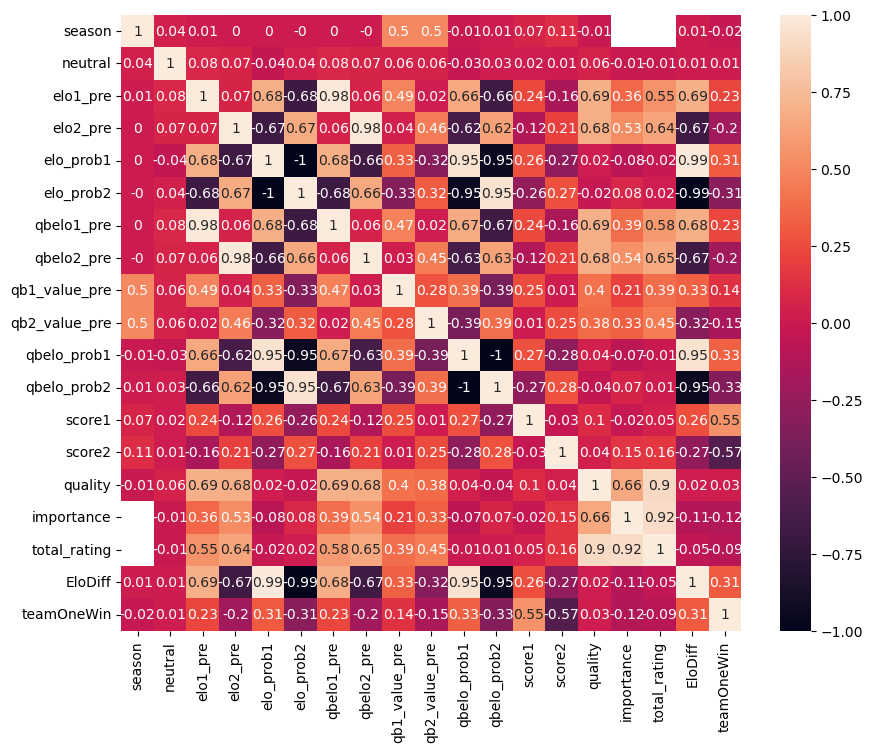

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2), annot = True)

In [10]:
def sigmoid(z):
    return 1 / (1 + (np.exp(-z)))

In [11]:
def compute_cost(w, b, x, y):
    
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w, x[i]) + b)
        
        total_cost += -y[i] * math.log(f_wb_i) - (1 - y[i]) * math.log(1 - f_wb_i)
        
    total_cost = total_cost / m
    
    return total_cost
        

In [12]:
def forward_propogation(w, b, x, y):
    
    f_wb = sigmoid(np.dot(x, w)  + b)
    
    return f_wb

In [13]:
def backward_propogation(w, b, x, y):

    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w, x[i]) + b)
        
        dj_dw += (f_wb_i - y[i]) * x[i]
        dj_db += f_wb_i - y[i]
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db
        

In [14]:
def update_parameters(w, b, x, y, alpha):
    
    dj_dw, dj_db = backward_propogation(w, b, x, y)
    
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    
    return w, b

In [15]:
# define parameters

predictor = 'EloDiff'
outcome = 'teamOneWin'

X_train, X_test, y_train, y_test = train_test_split(df[predictor], df[outcome], test_size = .2)

X_train, X_test, y_test, y_train = np.array(X_train), np.array(X_test), np.array(y_test), np.array(y_train)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

# scale X_train, X_test
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [16]:
def neural_network(X, y, iterations):
    w = 1
    b = 5
    
    alpha = .1
    
    for i in range(iterations):
        a = forward_propogation(w, b, X_train, y_train)
        
        cost = compute_cost(w, b, X, y)
        
        dj_dw, dj_db = backward_propogation(w, b, X, y)
        
        w, b = update_parameters(w, b, X, y, alpha)
        
        if i % 100 == 0:
            print(f"total cost at {i} iterations:", cost)
            
    return w, b

In [17]:
w, b = neural_network(X_train, y_train, 500)

total cost at 0 iterations: 1.9633632422282892
total cost at 100 iterations: 0.819753087038808
total cost at 200 iterations: 0.6436712068217484
total cost at 300 iterations: 0.6302699564141478
total cost at 400 iterations: 0.629751397084897


In [18]:
print("final w:", w)
print("final b:", b)

final w: [0.70030917]
final b: [0.35361062]


In [19]:
pred_df = pd.merge(pd.DataFrame(X_test), pd.DataFrame(y_test), left_index = True, right_index = True).reset_index(drop = True)
pred_df.rename(columns = {'0_x': 'ScaledEloDiff', '0_y': 'Win'}, inplace = True)

pred_df['LogProb'] = sigmoid(w * pred_df.ScaledEloDiff + b)
pred_df['PredictedWin'] = (pred_df.LogProb >= .5).replace({True: 1, False: 0})
pred_df

,ScaledEloDiff,Win,LogProb,PredictedWin
0,-2.304876,0,0.220885,0
1,-2.242961,0,0.228437,0
2,0.723676,1,0.702746,1
3,1.036535,0,0.746400,1
4,-0.539393,0,0.493968,0
...,...,...,...,...
2057,-1.690101,0,0.303649,0
2058,-1.199030,0,0.380817,0
2059,0.443261,1,0.660165,1
2060,-0.161386,0,0.559859,1


In [20]:
print("accuracy:", accuracy_score(pred_df.Win, pred_df.PredictedWin))
print("precision:", precision_score(pred_df.Win, pred_df.PredictedWin))
print("recall:", recall_score(pred_df.Win, pred_df.PredictedWin))

accuracy: 0.6503394762366634
precision: 0.6558396682791984
recall: 0.8097269624573379
